## Tasks to perform
#### Read in the file and get basic information about the data, including numerical summaries.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('bank-marketing.csv')
data.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


total 19 columns out of which 8 are numerical and 11 are categorical. and no null value in any column.

In [4]:
# numerical summary
data.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [81]:
data.shape

(45211, 19)

we have 45211 records with 19 columns

In [82]:
data.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

#### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [83]:
data['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

Yes, there is some problem with pday. Min value is -1 and we can see that 75% of data is -1.

In [84]:
# To count number of values
data.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

We can see that 36954 data is -1. This causing trouble in mean and median values.
if pdays = -1, it indicates that this person was not previosly contacted so, we will drop these records.
 pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999
 means client was not previously contacted)


In [5]:
pday_index = data[data['pdays']== -1].index

In [6]:
data.drop(pday_index,inplace= True)

In [7]:
data.shape

(8257, 19)

####  Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [88]:
data.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

After limiting to relevant values of pday the mean and median is much better.
previously mean was 40.197828 , after cleaning mean is 224.577.

#### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
edu_bal = data.groupby(['education'])['balance'].median()
edu_bal

education
primary      520.0
secondary    527.0
tertiary     775.0
unknown      782.0
Name: balance, dtype: float64

<AxesSubplot:ylabel='education'>

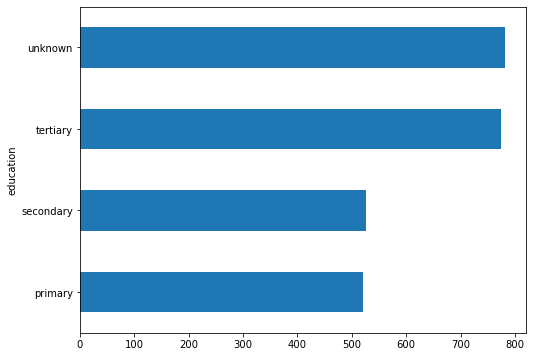

In [91]:
plt.figure(figsize=(8,6))
edu_bal.plot.barh()

The unknown group has the highest median
The tertiary is the second highest


#### Make a box plot for pdays. Do you see any outliers?

<AxesSubplot:xlabel='pdays'>

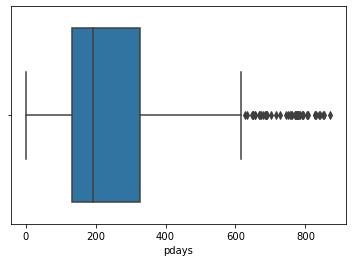

In [92]:
sns.boxplot(data['pdays'])

From the box plot we observe that our median lies at 200. The outliers are present after 600.

### Bi-variate analysis

#### Convert the response variable to a convenient form

In [93]:
data['response']

24060     no
24062    yes
24064    yes
24072     no
24077    yes
        ... 
45199     no
45201    yes
45204    yes
45208    yes
45210     no
Name: response, Length: 8257, dtype: object

Here, response column is in Categorical format. We can change yes to 1 and no to 0

In [94]:
data['response'].replace(('yes','no'),(1,0), inplace= True)

In [95]:
data['response']

24060    0
24062    1
24064    1
24072    0
24077    1
        ..
45199    0
45201    1
45204    1
45208    1
45210    0
Name: response, Length: 8257, dtype: int64

#### Make suitable plots for associations with numerical features and categorical features

In [96]:
Columns = data.columns

In [97]:
data_numerical = data.select_dtypes( include= 'int64')
data_numerical

,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,33,50000,882,21,39,1,151,3,0
24062,42,50000,-247,21,519,1,166,1,1
24064,33,70000,3444,21,144,1,91,4,1
24072,36,100000,2415,22,73,1,86,4,0
24077,36,100000,0,23,140,1,143,3,1
...,...,...,...,...,...,...,...,...,...
45199,34,20000,1475,16,1166,3,530,12,0
45201,53,100000,583,17,226,1,184,4,1
45204,73,55000,2850,17,300,1,40,8,1
45208,72,55000,5715,17,1127,5,184,3,1


In [98]:
numerical_col = data_numerical.columns.tolist()
numerical_col

['age',
 'salary',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'response']

In [99]:
data_categorical = data.select_dtypes(include= 'object')
data_categorical

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,admin.,married,tertiary,yes,no,no,no,telephone,oct,failure
24062,admin.,single,secondary,yes,no,yes,yes,telephone,oct,other
24064,services,married,secondary,yes,no,yes,no,telephone,oct,failure
24072,management,married,tertiary,yes,no,yes,no,telephone,oct,other
24077,management,married,tertiary,yes,no,yes,no,telephone,oct,failure
...,...,...,...,...,...,...,...,...,...,...
45199,blue-collar,single,secondary,yes,no,yes,no,cellular,nov,other
45201,management,married,tertiary,yes,no,no,no,cellular,nov,success
45204,retired,married,secondary,yes,no,no,no,cellular,nov,failure
45208,retired,married,secondary,yes,no,no,no,cellular,nov,success


In [100]:
categorical_col = data_categorical.columns.tolist()
categorical_col

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

<AxesSubplot:>

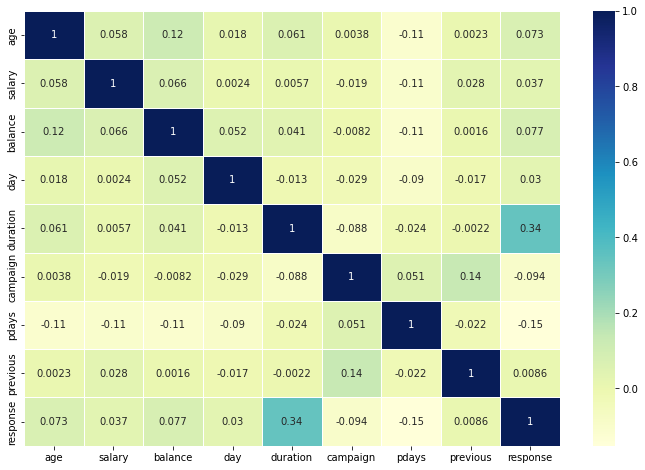

In [101]:
plt.figure(figsize=(12,8))
correlation = data.corr()
sns.heatmap(correlation,linewidths = 1, annot = True, cmap = 'YlGnBu')

#### Histogram for numerical data

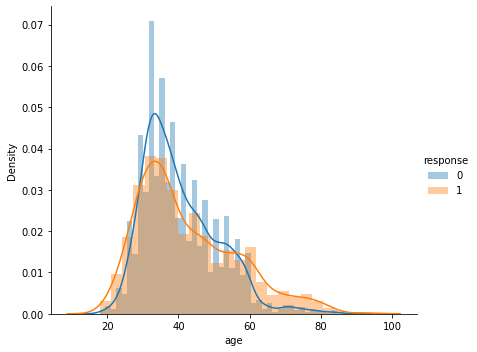

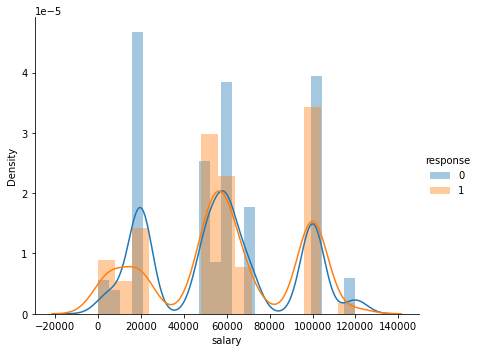

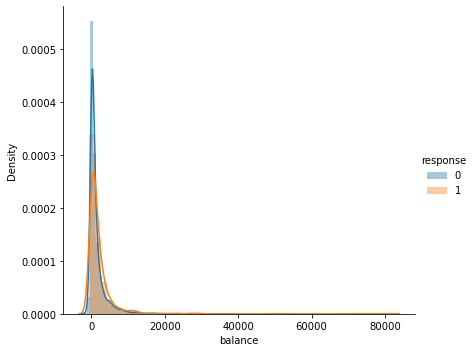

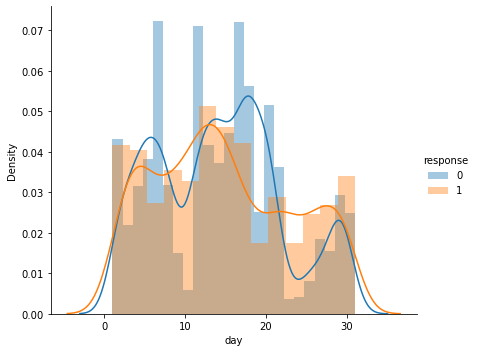

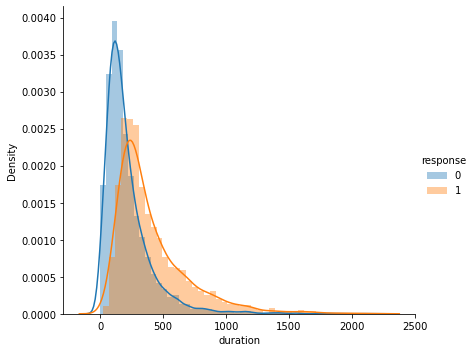

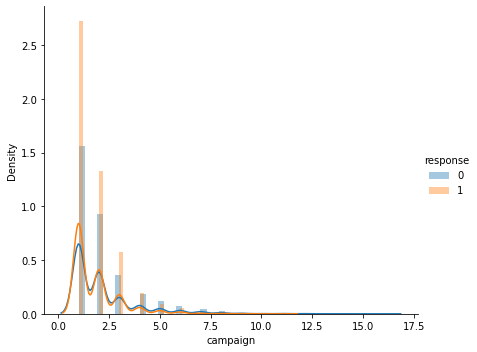

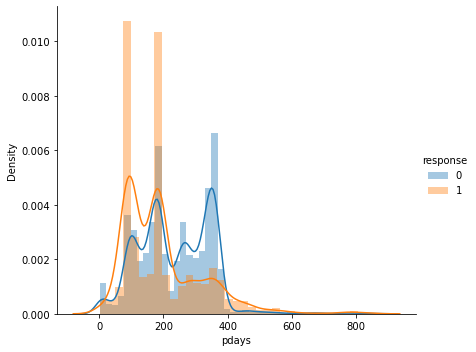

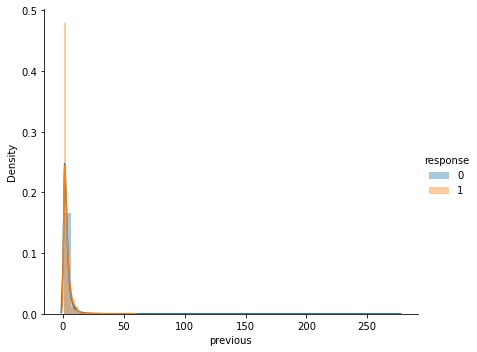

In [102]:
for i in numerical_col:
    if i != 'response':
        gr = sns.FacetGrid(data,hue= 'response', height= 5, aspect=1.2)
        gr.map(sns.distplot,i).add_legend()

#### Box Plot

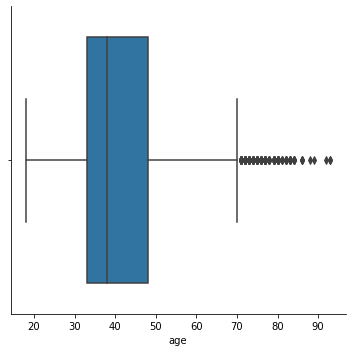

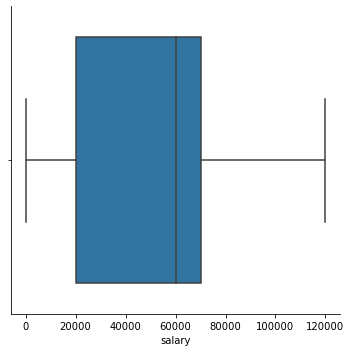

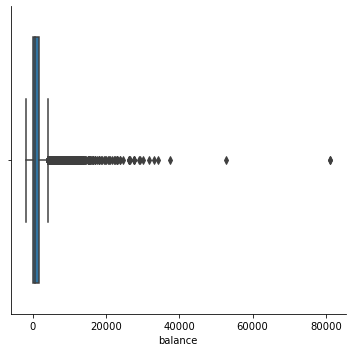

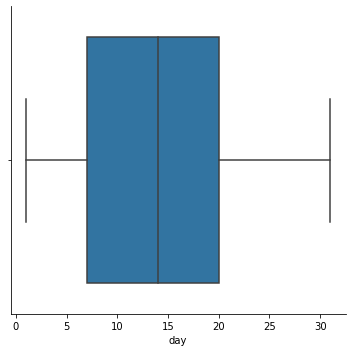

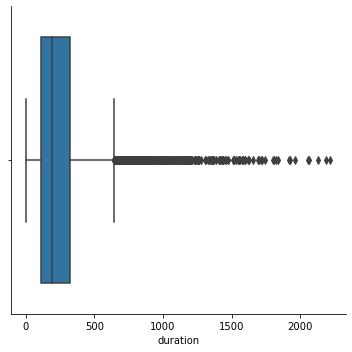

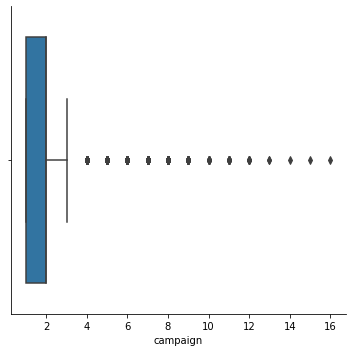

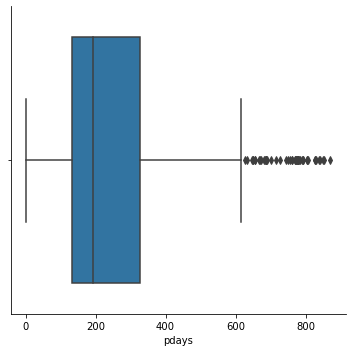

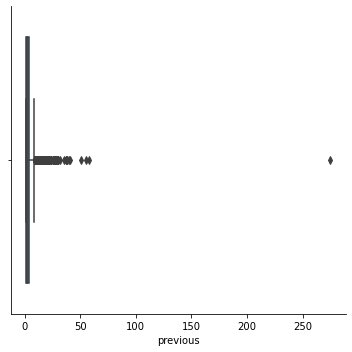

In [103]:
for i in numerical_col:
    if i != 'response':
        gr = sns.FacetGrid(data, height= 5)
        gr.map(sns.boxplot,i)

#### CountPlot for Categorical

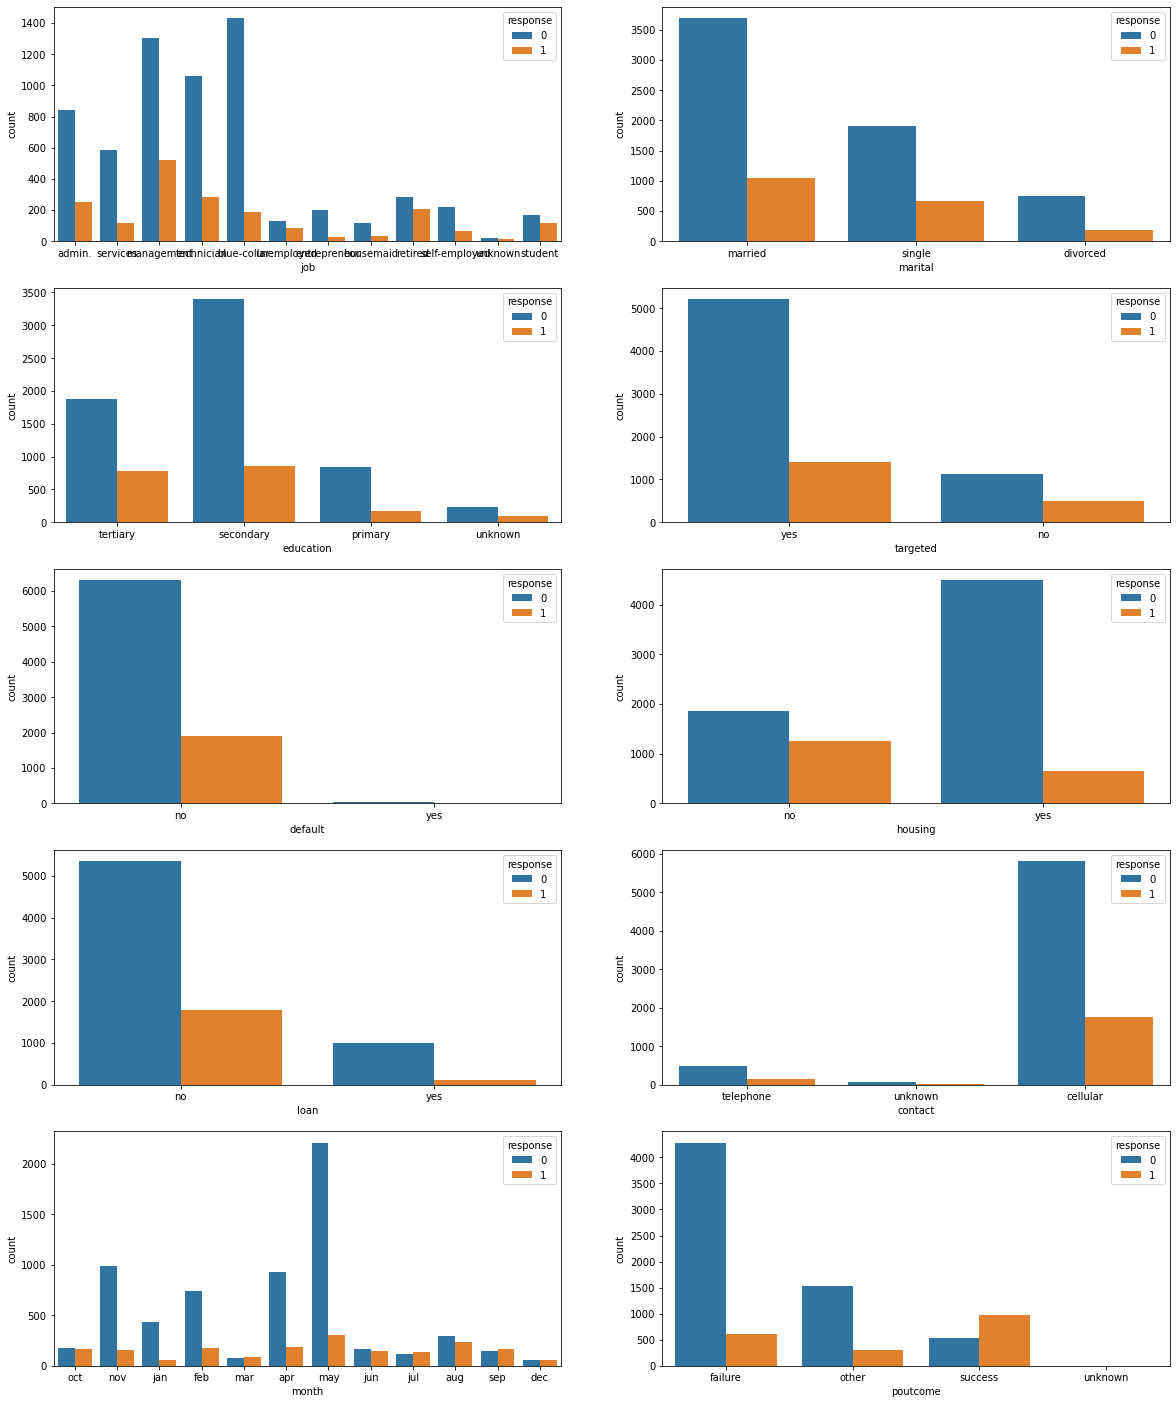

In [104]:
fig, axe = plt.subplots(figsize=(20,25), ncols= 2, nrows= 5)
for ax,j in list(zip(axe.flat,categorical_col)):
    sns.countplot(j,data = data,hue= data['response'],ax= ax)

#### Are the features about the previous campaign data useful?

In [105]:
data[numerical_col].corr()['response']

age         0.072577
salary      0.036774
balance     0.076995
day         0.029952
duration    0.342610
campaign   -0.094110
pdays      -0.152206
previous    0.008622
response    1.000000
Name: response, dtype: float64

From above Correlation, we can see that the previous columns in highly correlated.

#### Are pdays and poutcome associated with the target?
#### If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.

Ans: Yes, both pday and previous outcome data is associated with target. If poutcome was a success then we have a high chance of success again.

If pday = -1, it indicates that that particular person was not in particular contacted, so we have to dropped these records. As we want to study about the people involve in the campaign.


### Preprocessing
#### The necessary transformations for the categorical variables and the numeric variables

In [106]:
df = data.copy(deep=True)

In [107]:
from sklearn.preprocessing import LabelEncoder
df[categorical_col] = df[categorical_col].apply(LabelEncoder().fit_transform)

In [108]:
df.head(10)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,0,50000,1,2,1,0,882,0,0,1,21,10,39,1,151,3,0,0
24062,42,0,50000,2,1,1,0,-247,1,1,1,21,10,519,1,166,1,1,1
24064,33,7,70000,1,1,1,0,3444,1,0,1,21,10,144,1,91,4,0,1
24072,36,4,100000,1,2,1,0,2415,1,0,1,22,10,73,1,86,4,1,0
24077,36,4,100000,1,2,1,0,0,1,0,1,23,10,140,1,143,3,0,1
24080,56,9,60000,1,1,1,0,589,1,0,2,23,10,518,1,147,2,2,1
24086,44,1,20000,1,1,1,0,1324,1,0,1,25,10,119,1,89,2,1,0
24122,26,9,60000,2,2,0,0,172,0,1,1,4,9,21,1,140,4,1,0
24127,51,0,50000,2,1,1,0,3132,0,0,1,5,9,449,1,176,1,0,0
24136,34,4,100000,1,2,1,0,1770,1,0,2,6,9,26,1,101,11,1,0


#### Train test split

In [109]:
Y = df['response']
X = df.drop('response',axis= 1)

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size= 0.3,train_size= 0.7,random_state= 2)

In [111]:
x_train.shape

(5779, 18)

In [112]:
y_train.shape

(5779,)

# Feature Scaling


In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train[numerical_col[:-1]])

StandardScaler()

In [114]:
x_train[numerical_col[:-1]] = sc.transform(x_train[numerical_col[:-1]])
x_train.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
41033,-0.687923,0,-0.236247,1,1,1,0,0.064442,0,0,0,-0.043895,1,-0.128308,-0.042671,-1.029223,-0.238035,0
29519,0.622943,0,-0.236247,1,0,1,0,-0.514071,1,0,0,-1.433527,3,-0.817905,-0.679873,0.233205,0.167628,0
35904,0.797725,4,1.343126,0,2,0,0,-0.396300,0,0,0,-0.801876,8,-0.258420,-0.042671,1.149763,0.370460,1
37332,-0.338359,4,1.343126,2,2,0,0,-0.515072,1,0,0,-0.170225,8,-0.644421,-0.679873,1.028708,-0.440867,0
36175,-1.561833,8,-1.689271,2,1,1,0,0.289641,1,0,0,-0.422886,8,-0.080600,1.868934,1.227584,-0.238035,0


In [115]:
x_test[numerical_col[:-1]] = sc.transform(x_test[numerical_col[:-1]])
x_test.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
42189,-0.076185,4,1.343126,1,2,1,0,-0.515072,0,0,0,-0.549216,9,-0.479612,-0.679873,-1.115691,0.978956,2
42290,-0.687923,0,-0.236247,1,1,1,0,-0.208133,0,0,0,0.208765,9,-0.553342,-0.679873,-1.124338,-0.238035,0
42828,1.671635,4,1.343126,1,2,1,0,0.619601,0,0,0,-1.559857,3,-0.592376,-0.679873,-1.124338,-0.238035,2
36460,-0.600532,1,-1.183872,1,1,1,0,-0.511736,1,1,0,-0.422886,8,-0.267095,-0.042671,1.132470,-0.440867,0
37845,1.322071,1,-1.183872,1,1,1,0,-0.600481,1,1,0,-0.043895,8,-0.718152,-0.679873,1.253525,-0.238035,0


## Predictive model 1: Logistic regression
#### Make a predictive model using logistic regression

In [116]:
from sklearn.linear_model import LogisticRegression
lo = LogisticRegression()
lo.fit(x_train,y_train)

LogisticRegression()

In [117]:
Y_pred = lo.predict(x_test)

In [118]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [119]:
print('Accuracy: ',accuracy_score(y_test,Y_pred))
print('Precision: ', precision_score(y_test,Y_pred))
print('Recall: ',recall_score(y_test,Y_pred))
print('\nClassification_report\n')
print(classification_report(y_test,Y_pred))
print('Confusion Metrix: ', confusion_matrix(y_test,Y_pred))

Accuracy:  0.8272800645682001
Precision:  0.6681222707423581
Recall:  0.5257731958762887

Classification_report

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1896
           1       0.67      0.53      0.59       582

    accuracy                           0.83      2478
   macro avg       0.77      0.72      0.74      2478
weighted avg       0.82      0.83      0.82      2478

Confusion Metrix:  [[1744  152]
 [ 276  306]]


In [120]:
from sklearn.model_selection import cross_val_score
cross_val_score(lo, X, Y, cv=5)

array([0.79539952, 0.67251816, 0.77892187, 0.7752877 , 0.75529982])

#### Use RFE to select top n features in an automated fashion

In [121]:
from sklearn.feature_selection import RFE
rfe = RFE(lo,14)
rf = rfe.fit(x_train,y_train)
rf

RFE(estimator=LogisticRegression(), n_features_to_select=14)

In [122]:
Rank = rf.ranking_
Rank

array([1, 1, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1])

In [123]:
print(x_train.columns[rf.support_])

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'duration', 'campaign', 'previous',
       'poutcome'],
      dtype='object')


Bigger value in rank means that they were dropped at early stage.

In [124]:
new_col = x_train.columns[rf.support_]
lo.fit(x_train[new_col],y_train)
y_predict_2 = lo.predict(x_test[new_col])

In [125]:
print('Accuracy: ',accuracy_score(y_test,y_predict_2))
print('Precision: ', precision_score(y_test,y_predict_2))
print('Recall: ',recall_score(y_test,y_predict_2))
print('\nClassification_report\n')
print(classification_report(y_test,y_predict_2))

Accuracy:  0.827683615819209
Precision:  0.6688453159041394
Recall:  0.5274914089347079

Classification_report

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1896
           1       0.67      0.53      0.59       582

    accuracy                           0.83      2478
   macro avg       0.77      0.72      0.74      2478
weighted avg       0.82      0.83      0.82      2478



#### Using p values and VIF, get rid of the redundant features

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['features'] = x_train[new_col].columns
vif_data['VIF'] = [variance_inflation_factor(x_train[new_col].values,a) for a in range(len(x_train[new_col].columns))]

In [127]:
vif_data

,features,VIF
0,age,1.161783
1,job,2.637651
2,marital,3.985171
3,education,3.570510
4,default,1.010772
5,balance,1.037358
6,housing,2.162369
7,loan,1.175154
8,contact,1.120503
9,day,1.008225


In [128]:
from statsmodels.tools import add_constant
x_train_const = add_constant(x_train[new_col])
x_train_const.head()

,const,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,previous,poutcome
41033,1.0,-0.687923,0,1,1,0,0.064442,0,0,0,-0.043895,-0.128308,-0.042671,-0.238035,0
29519,1.0,0.622943,0,1,0,0,-0.514071,1,0,0,-1.433527,-0.817905,-0.679873,0.167628,0
35904,1.0,0.797725,4,0,2,0,-0.396300,0,0,0,-0.801876,-0.258420,-0.042671,0.370460,1
37332,1.0,-0.338359,4,2,2,0,-0.515072,1,0,0,-0.170225,-0.644421,-0.679873,-0.440867,0
36175,1.0,-1.561833,8,2,1,0,0.289641,1,0,0,-0.422886,-0.080600,1.868934,-0.238035,0


In [129]:
import statsmodels.api as sm
model = sm.OLS(y_train,x_train_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     190.8
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:37:21   Log-Likelihood:                -2088.5
No. Observations:                5779   AIC:                             4207.
Df Residuals:                    5764   BIC:                             4307.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1534      0.017      8.914      0.0

In [130]:
p_val = []
for i in new_col:
    val = round(model.pvalues[i],5)
    p_val.append(val)
p_val

[0.00491,
 0.0459,
 0.02337,
 0.0,
 0.87203,
 0.14214,
 0.0,
 4e-05,
 0.01284,
 0.38855,
 0.0,
 3e-05,
 0.96602,
 0.0]

In [131]:
P_Value = zip(new_col,p_val)
P_Value

In [132]:
data_Pval = pd.DataFrame(P_Value,columns=['Feature','P_val']).sort_values('P_val')
data_Pval

,Feature,P_val
3,education,0.00000
6,housing,0.00000
10,duration,0.00000
13,poutcome,0.00000
11,campaign,0.00003
7,loan,0.00004
0,age,0.00491
8,contact,0.01284
2,marital,0.02337
1,job,0.04590


In [133]:
Features = data_Pval.nlargest(9,'P_val')['Feature'].tolist()
Features

['previous',
 'default',
 'day',
 'balance',
 'job',
 'marital',
 'contact',
 'age',
 'loan']

In [134]:
lo.fit(x_train[Features],y_train)
final_predict = lo.predict(x_test[Features])
print('Accuracy: ',accuracy_score(y_test,final_predict))
print('Precision: ', precision_score(y_test,final_predict))
print('Recall: ',recall_score(y_test,final_predict))
print('\nClassification_report\n')
print(classification_report(y_test,final_predict))
print('Confusion Metrix: \n', confusion_matrix(y_test,final_predict))

In [136]:
from sklearn.model_selection import cross_val_score
cross_val_score(lo,X,Y,cv = 7)

array([0.79322034, 0.76949153, 0.63474576, 0.77372881, 0.78286684,
       0.74385072, 0.74300254])

#### Which features are the most important from your model?

In [137]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(lo)
smf.fit(x_train,y_train)
support = smf.get_support()
Feature_names = x_train.columns[support]
Feature_names

Index(['education', 'housing', 'loan', 'contact', 'duration', 'poutcome'], dtype='object')

These features are the most important

#### What is the precision, recall, accuracy of your model?

In [138]:
lo.fit(x_train[Feature_names],y_train)
final_predict = lo.predict(x_test[Feature_names])

In [139]:
print('Accuracy: ',accuracy_score(y_test,final_predict))
print('Precision: ', precision_score(y_test,final_predict))
print('Recall: ',recall_score(y_test,final_predict))
print('\nClassification_report\n')
print(classification_report(y_test,final_predict))
print('Confusion Metrix: \n', confusion_matrix(y_test,final_predict))

Accuracy:  0.8232445520581114
Precision:  0.6621621621621622
Recall:  0.5051546391752577

Classification_report

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1896
           1       0.66      0.51      0.57       582

    accuracy                           0.82      2478
   macro avg       0.76      0.71      0.73      2478
weighted avg       0.81      0.82      0.81      2478

Confusion Metrix: 
 [[1746  150]
 [ 288  294]]


## Predictive model 2: Random Forest
#### Make a predictive model using random forest technique

In [140]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 50)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [141]:
rfc_pred = rfc.predict(x_test)

In [142]:
print('Accuracy: ',accuracy_score(y_test,rfc_pred))
print('Precision: ', precision_score(y_test,rfc_pred))
print('Recall: ',recall_score(y_test,rfc_pred))
print('\nClassification_report\n')
print(classification_report(y_test,rfc_pred))
print('Confusion Metrix: \n', confusion_matrix(y_test,rfc_pred))

Accuracy:  0.8454398708635997
Precision:  0.7085953878406709
Recall:  0.5807560137457045

Classification_report

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1896
           1       0.71      0.58      0.64       582

    accuracy                           0.85      2478
   macro avg       0.79      0.75      0.77      2478
weighted avg       0.84      0.85      0.84      2478

Confusion Metrix: 
 [[1757  139]
 [ 244  338]]


#### Selecting Important Feature

In [143]:
f_important = rfc.feature_importances_
f_important

array([0.06909864, 0.03284582, 0.03123459, 0.01602428, 0.01830651,
       0.00897385, 0.00053038, 0.07631762, 0.03885035, 0.00783219,
       0.00720742, 0.06906392, 0.06427913, 0.21252814, 0.02667911,
       0.11425647, 0.03804519, 0.16792639])

In [144]:
features_rfc = pd.Series(f_important,index= x_train.columns).sort_values(ascending=False)
features_rfc

duration     0.212528
poutcome     0.167926
pdays        0.114256
balance      0.076318
age          0.069099
day          0.069064
month        0.064279
housing      0.038850
previous     0.038045
job          0.032846
salary       0.031235
campaign     0.026679
education    0.018307
marital      0.016024
targeted     0.008974
loan         0.007832
contact      0.007207
default      0.000530
dtype: float64

In [145]:
top_featues = features_rfc.index.tolist()


In [146]:
rfc.fit(x_train[top_featues[:7]],y_train)
rfc_pred2 = rfc.predict(x_test[top_featues[:7]])

In [147]:
print('Accuracy: ',accuracy_score(y_test,rfc_pred2))
print('Precision: ', precision_score(y_test,rfc_pred2))
print('Recall: ',recall_score(y_test,rfc_pred2))
print('\nClassification_report\n')
print(classification_report(y_test,rfc_pred2))
print('Confusion Metrix: \n', confusion_matrix(y_test,rfc_pred2))

Accuracy:  0.8462469733656174
Precision:  0.710691823899371
Recall:  0.5824742268041238

Classification_report

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1896
           1       0.71      0.58      0.64       582

    accuracy                           0.85      2478
   macro avg       0.79      0.75      0.77      2478
weighted avg       0.84      0.85      0.84      2478

Confusion Metrix: 
 [[1758  138]
 [ 243  339]]


## Compare the performance of the Random Forest and the logistic model

In [148]:
print('\nLogistic Regression\n')
print('Accuracy: ',accuracy_score(y_test,final_predict))
print('Precision: ', precision_score(y_test,final_predict))
print('Recall: ',recall_score(y_test,final_predict))
print('\nClassification_report\n')
print(classification_report(y_test,final_predict))
print('Confusion Metrix: \n', confusion_matrix(y_test,final_predict))
print('Cross Validation: ',cross_val_score(lo,X,Y,cv = 7))


Logistic Regression

Accuracy:  0.8232445520581114
Precision:  0.6621621621621622
Recall:  0.5051546391752577

Classification_report

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1896
           1       0.66      0.51      0.57       582

    accuracy                           0.82      2478
   macro avg       0.76      0.71      0.73      2478
weighted avg       0.81      0.82      0.81      2478

Confusion Metrix: 
 [[1746  150]
 [ 288  294]]
Cross Validation:  [0.79322034 0.76949153 0.63474576 0.77372881 0.78286684 0.74385072
 0.74300254]


In [149]:
print('\nRandom Forest\n')
print('Accuracy: ',accuracy_score(y_test,rfc_pred2))
print('Precision: ', precision_score(y_test,rfc_pred2))
print('Recall: ',recall_score(y_test,rfc_pred2))
print('\nClassification_report\n')
print(classification_report(y_test,rfc_pred2))
print('Confusion Metrix: \n', confusion_matrix(y_test,rfc_pred2))
print('Cross Validation: ',cross_val_score(rfc,X,Y,cv = 7))


Random Forest

Accuracy:  0.8462469733656174
Precision:  0.710691823899371
Recall:  0.5824742268041238

Classification_report

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1896
           1       0.71      0.58      0.64       582

    accuracy                           0.85      2478
   macro avg       0.79      0.75      0.77      2478
weighted avg       0.84      0.85      0.84      2478

Confusion Metrix: 
 [[1758  138]
 [ 243  339]]
Cross Validation:  [0.72711864 0.77118644 0.45762712 0.80169492 0.85835454 0.70568278
 0.60305344]


The accuracy of Random Forest is high.
The top features are similar to each other.